In [20]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\HP\Desktop\perinatal_prediction\Final\FSAnxietyTrain.csv")
dataset = dataset.drop('Unnamed: 0', axis = 1)

In [3]:
features, labels = dataset.drop('AnxietyDi', axis=1).values, dataset['AnxietyDi'].values
headers = list(dataset.drop("AnxietyDi", axis=1))
fs = TuRF(core_algorithm="ReliefF", n_features_to_select=15, pct=0.4,verbose=True)
fs.fit(features, labels, headers)
for feature_name, feature_score in zip(dataset.drop('AnxietyDi', axis=1).columns, fs.feature_importances_):
    print(feature_name, '\t', feature_score)

Created distance array in 0.09375286102294922 seconds.
Feature scoring under way ...
Completed scoring in 13.699408531188965 seconds.
Created distance array in 0.019988536834716797 seconds.
Feature scoring under way ...
Completed scoring in 7.833094120025635 seconds.
Created distance array in 0.013965845108032227 seconds.
Feature scoring under way ...
Completed scoring in 5.317043781280518 seconds.
Ethnicity 	 0.0371203012422266
Education 	 0.0385976506211133
background 	 0.09887499999999995
Household_Income 	 0.0385976506211133
Household_decision 	 0.14529999999999993
Age_Maternalnew 	 0.06508897727272725
LiveBirths 	 0.06812500000000006
StillBirths 	 0.0385976506211133
Fights_inlaws 	 0.0371203012422266
Child_death 	 0.0371203012422266
Miscarriage 	 0.0385976506211133
Relationship_prob 	 0.0371203012422266
Long_illness 	 0.0385976506211133
other 	 0.0385976506211133
Social_Support 	 0.18780993788866954
Total_svd 	 0.0385976506211133
total_epiziotomies 	 0.0371203012422266
Total_Csect

In [4]:
print(fs.feature_importances_)

[0.0371203  0.03859765 0.098875   0.03859765 0.1453     0.06508898
 0.068125   0.03859765 0.0371203  0.0371203  0.03859765 0.0371203
 0.03859765 0.03859765 0.18780994 0.03859765 0.0371203  0.03859765
 0.03859765 0.03859765 0.03859765 0.11375    0.03859765 0.11665
 0.09524215 0.10615667 0.0371203  0.0371203  0.03859765 0.0371203
 0.0371203  0.0371203  0.0371203  0.0371203  0.0371203  0.0371203 ]


In [5]:
print(fs.top_features_)

[14, 4, 21, 23, 25, 24, 2, 6, 5, 17, 19, 28, 18]


In [6]:
#[14, 4, 23, 21, 2, 17, 6, 19, 5, 25, 18, 28, 15]

In [8]:
import seaborn as sns
arr = fs.feature_importances_
arr.sort()
newdf = pd.DataFrame(arr)

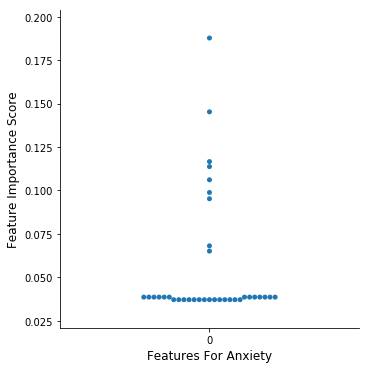

In [27]:
ax = sns.catplot(data=newdf, kind="swarm")
plt.xlabel('Features For Anxiety',fontsize=12)
plt.ylabel('Feature Importance Score',fontsize=12)
plt.savefig("FSA.png", dpi = 600, bbox_inches='tight')